In [1]:
# 1- Importing the data and the libraries needed for analysis
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
cat_col = ['ChestPainType' , 'Sex' ,'FastingBS', 'RestingECG' ,'ExerciseAngina', 'ST_Slope' ,'HeartDisease']

In [9]:
for col in cat_col:
    print(df[col].value_counts())
    print('--------------------------')

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
--------------------------
M    725
F    193
Name: Sex, dtype: int64
--------------------------
0    704
1    214
Name: FastingBS, dtype: int64
--------------------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
--------------------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
--------------------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
--------------------------
1    508
0    410
Name: HeartDisease, dtype: int64
--------------------------


<AxesSubplot:xlabel='Sex', ylabel='count'>

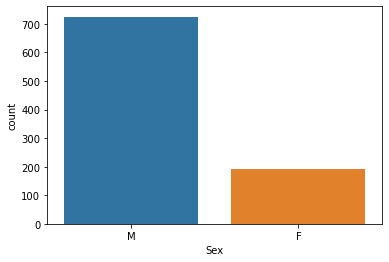

In [10]:
sns.countplot(data = df , x= 'Sex')

In [11]:
for col in cat_col[:-1]:
    print(df.groupby(col)['HeartDisease'].mean())
    print('-----------------------')

ChestPainType
ASY    0.790323
ATA    0.138728
NAP    0.354680
TA     0.434783
Name: HeartDisease, dtype: float64
-----------------------
Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64
-----------------------
FastingBS
0    0.480114
1    0.794393
Name: HeartDisease, dtype: float64
-----------------------
RestingECG
LVH       0.563830
Normal    0.516304
ST        0.657303
Name: HeartDisease, dtype: float64
-----------------------
ExerciseAngina
N    0.351005
Y    0.851752
Name: HeartDisease, dtype: float64
-----------------------
ST_Slope
Down    0.777778
Flat    0.828261
Up      0.197468
Name: HeartDisease, dtype: float64
-----------------------


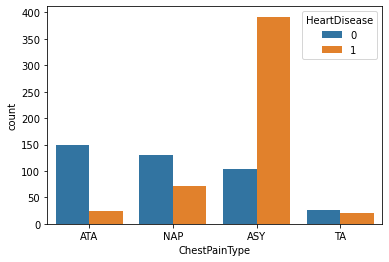

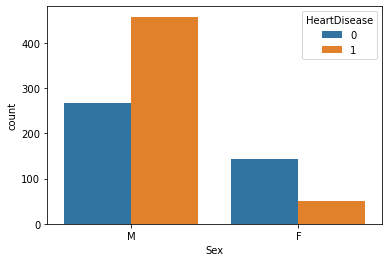

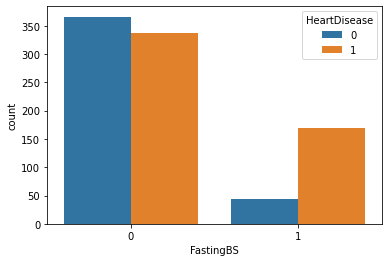

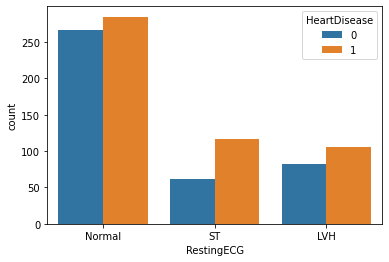

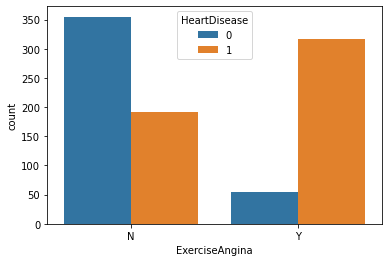

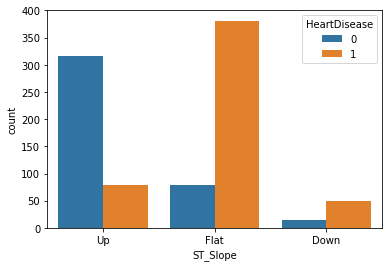

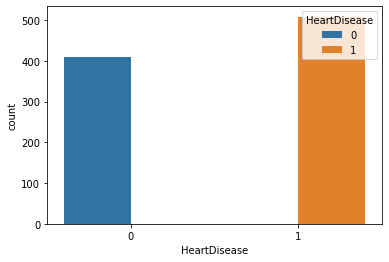

In [12]:
for col in cat_col:
    #plt.figure(figsize=(14,6))
    sns.countplot(data = df , x=col ,hue='HeartDisease')
    plt.show()

In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
num_col =['Age', 'RestingBP' , 'Cholesterol' , 'MaxHR','Oldpeak']

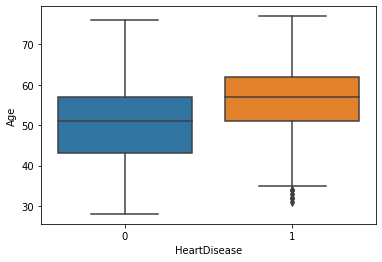

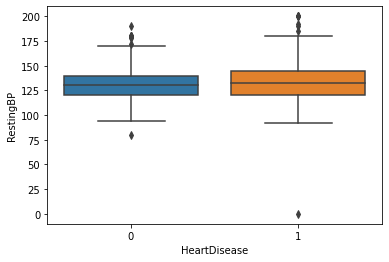

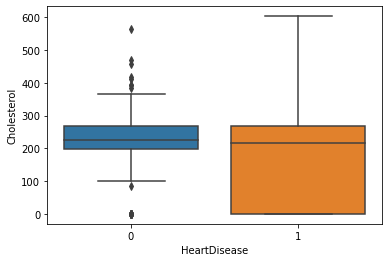

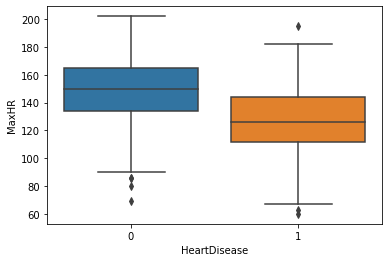

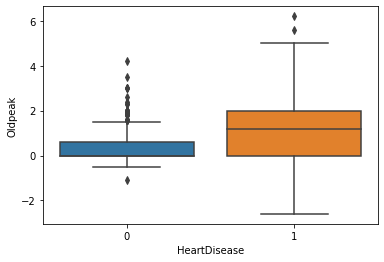

In [15]:
for col in num_col:
   # plt.figure(figsize=(14,6))
    sns.boxplot(data = df , x ='HeartDisease' ,y=col  )
    plt.show()

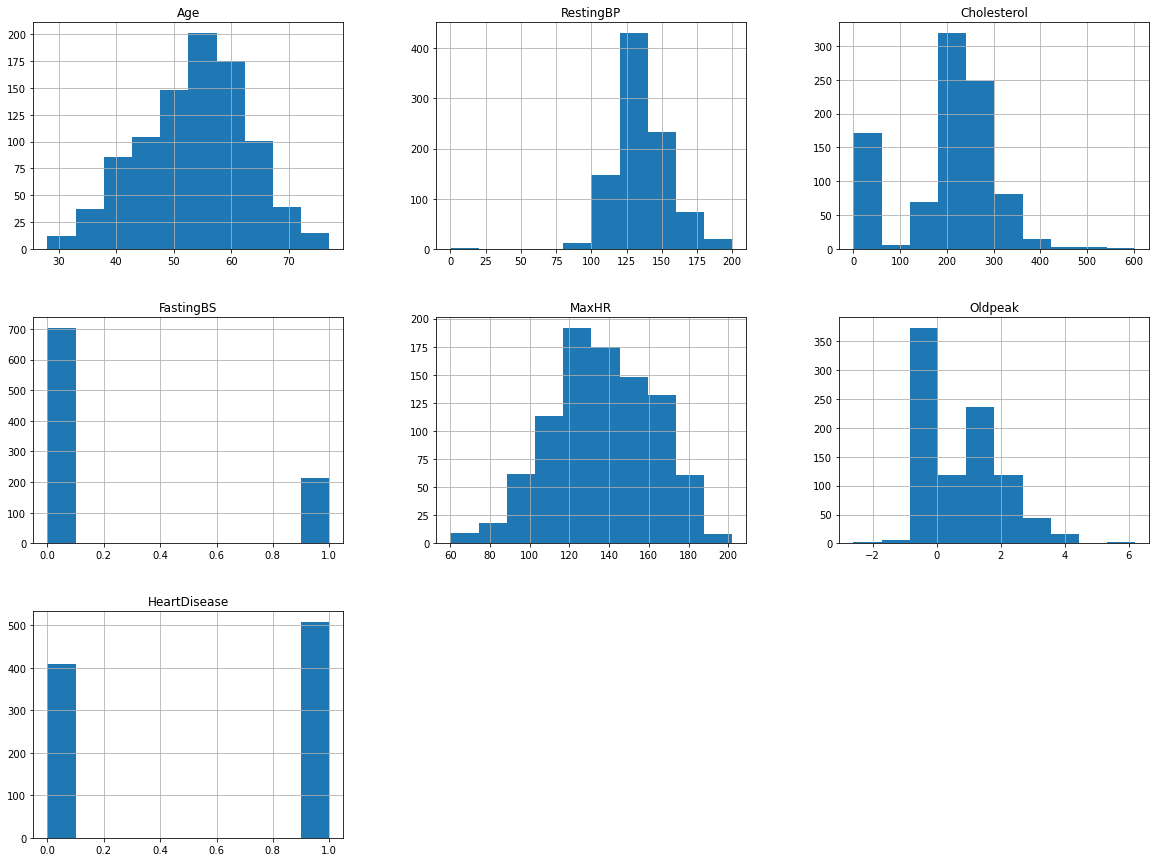

In [16]:
df.hist(figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

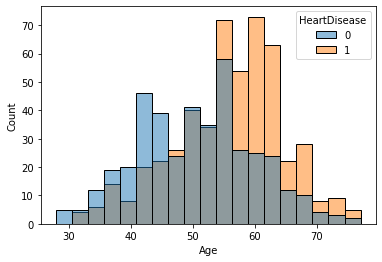

In [17]:
sns.histplot(data = df , x='Age' ,hue = 'HeartDisease')

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

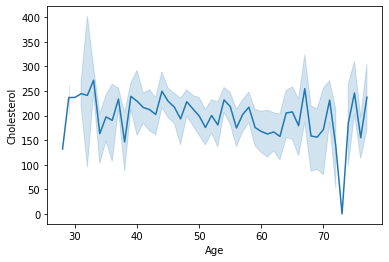

In [18]:
sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)

<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

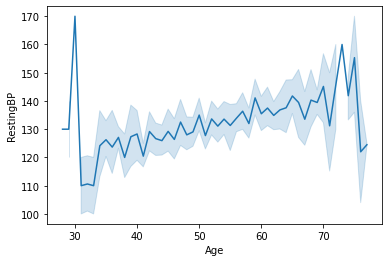

In [19]:
sns.lineplot(x=df['Age'],y=df['RestingBP'],data=df)

In [20]:
# removing Outliers 
for col in num_col:
    Q1 = df[col].quantile(0.15)
    Q3 = df[col].quantile(0.85)
    IQR = Q3 - Q1
    df = df[df[col] <= (Q3+(1.5*IQR))]
    df = df[df[col] >= (Q1-(1.5*IQR))]

In [21]:
df.shape

(915, 12)

In [22]:
df.groupby('Sex')['HeartDisease'].mean()

Sex
F    0.255208
M    0.630705
Name: HeartDisease, dtype: float64

In [23]:
df.groupby('ChestPainType')['HeartDisease'].mean()

ChestPainType
ASY    0.789474
ATA    0.138728
NAP    0.351485
TA     0.434783
Name: HeartDisease, dtype: float64

In [24]:
df.groupby('FastingBS')['HeartDisease'].mean()

FastingBS
0    0.477889
1    0.794393
Name: HeartDisease, dtype: float64

In [25]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.261990,-0.094905,0.198965,-0.382831,0.259379,0.281349
RestingBP,0.261990,1.000000,0.089981,0.069111,-0.109988,0.168293,0.116344
Cholesterol,-0.094905,0.089981,1.000000,-0.262785,0.238164,0.053661,-0.231546
FastingBS,0.198965,0.069111,-0.262785,1.000000,-0.131608,0.060229,0.269406
MaxHR,-0.382831,-0.109988,0.238164,-0.131608,1.000000,-0.162151,-0.401333
Oldpeak,0.259379,0.168293,0.053661,0.060229,-0.162151,1.000000,0.404678
HeartDisease,0.281349,0.116344,-0.231546,0.269406,-0.401333,0.404678,1.000000


<AxesSubplot:>

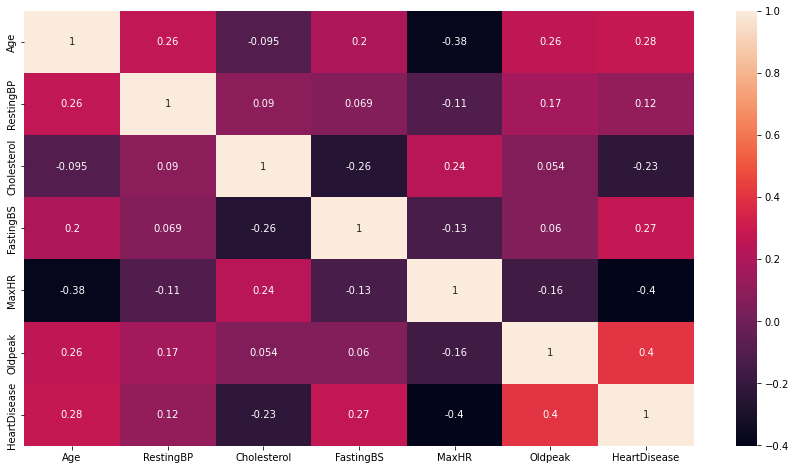

In [26]:
#correlation between columns 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot=True )

In [36]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Text(0.5, 1.0, 'Relationship between RestingBP & Age')

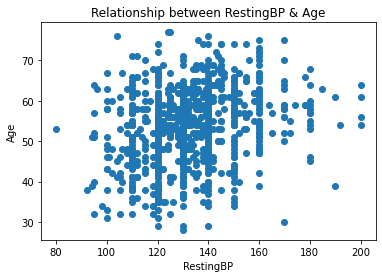

In [39]:
plt.scatter(df['RestingBP'] , df['Age'])
plt.xlabel('RestingBP')
plt.ylabel('Age')
plt.title('Relationship between RestingBP & Age')

Text(0.5, 1.0, 'Relationship between Cholesterol & Age')

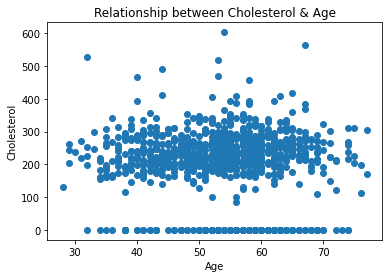

In [42]:
plt.scatter( df['Age'] , df['Cholesterol'] )
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Relationship between Cholesterol & Age')

In [40]:
#sns.pairplot(df , hue = 'HeartDisease')

In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


encodeing categorical data into numerical

In [103]:
df['Sex'] = df['Sex'].map({'M' :0 , 'F' :1})

In [104]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0 , 'Y': 1})

In [105]:
df['ST_Slope'] = df['ST_Slope'].map({'Up':0 , 'Flat':1 , 'Down':2})

In [106]:
df['RestingECG'] = df['RestingECG'].map({'Normal':0 ,'LVH':1 ,'ST':2})

In [107]:
ChestPain = pd.get_dummies(df['ChestPainType'])

In [108]:
ChestPain

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [109]:
df = pd.concat([df ,ChestPain] , axis=1)

In [110]:
df = df.drop('ChestPainType' , axis=1)

In [111]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,0,140,289,0,0,172,0,0.0,0,0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,1,0,0,1,0
2,37,0,130,283,0,2,98,0,0.0,0,0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,1,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,0,132,0,1.2,1,1,0,0,0,1
914,68,0,144,193,1,0,141,0,3.4,1,1,1,0,0,0
915,57,0,130,131,0,0,115,1,1.2,1,1,1,0,0,0
916,57,1,130,236,0,1,174,0,0.0,1,1,0,1,0,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             915 non-null    int64  
 1   Sex             915 non-null    int64  
 2   RestingBP       915 non-null    int64  
 3   Cholesterol     915 non-null    int64  
 4   FastingBS       915 non-null    int64  
 5   RestingECG      915 non-null    int64  
 6   MaxHR           915 non-null    int64  
 7   ExerciseAngina  915 non-null    int64  
 8   Oldpeak         915 non-null    float64
 9   ST_Slope        915 non-null    int64  
 10  HeartDisease    915 non-null    int64  
 11  ASY             915 non-null    uint8  
 12  ATA             915 non-null    uint8  
 13  NAP             915 non-null    uint8  
 14  TA              915 non-null    uint8  
dtypes: float64(1), int64(10), uint8(4)
memory usage: 121.6 KB


In [113]:
# 5- Dividing the data into dependent and independent variables
y = df['HeartDisease']
X = df.drop('HeartDisease' , axis=1)

In [114]:
# 6 -Splitting the data into training and test sets
X_train , X_test , y_train ,y_test = train_test_split(X,y ,test_size=0.2 ,random_state=15)